In [13]:
# Import required dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [14]:
#set # if nax rows and columns to show
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)

In [15]:
#reading csv file from link
df=pd.read_csv('https://docs.google.com/spreadsheets/d/1_ODNIn5n1k9RSVr_7gV2On4idZ6v0B2XPeMhCD18kio/pub?gid=1188863554&single=true&output=csv')
#df.head()

In [16]:
chiefs = df['chief'].unique()


In [17]:
x = 0
for chief in chiefs:
    print(chief)
    df.loc[df['chief'] == chief, 'chief_term'] = x
    #dfcoyp['chief_term'] = x
    x = x + 1

Vinson
Warren
Burger
Rehnquist
Roberts


partywinning
is disposition direction
Declaration uncon
case disposition
Vote unclear
isdecisiondirection
issuearea
decisiondirectiondissent
lawsupp
case source

In [28]:
X=df[[#"term",
#"petitioner",
#"respondent",
#"adminAction",
#"caseOrigin",
#"caseSource",
#"lcDisagreement",
#"lcDispositionDirection",
#"declarationUncon",
#"caseDispositionUnusual",
#"caseDisposition",
#"precedentAlteration",
#"voteUnclear",
#"issue",
#"issueArea",
#"decisionDirectionDissent",
#"authorityDecision1",
#"lawSupp",
#"majOpinWriter",
#"majOpinAssigner",
#"decisionDirection",
"decisionType",
"threeJudgeFdc",
"certReason",
"lcDisposition",
"partyWinning",
"majVotes",
"chief_term",
"decisionType",
"minVotes",
"caseDisposition"
]]

In [29]:
y=df[["decisionDirection"]]

In [30]:
#X = df.drop(columns=y)

In [31]:
y.isna().sum()

decisionDirection    43
dtype: int64

In [32]:
#y_reshaped = y.reshape(-1, 1)

In [33]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(strategy='constant', fill_value=3)
#caseDisposition = df[['caseDisposition']]
y_imputed = pd.DataFrame(imputer.fit_transform(y))
print(y_imputed)

         0
0      2.0
1      1.0
2      1.0
3      1.0
4      1.0
...    ...
13849  2.0
13850  2.0
13851  1.0
13852  1.0
13853  1.0

[13854 rows x 1 columns]


In [34]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
print(X_imputed)

       decisionType  threeJudgeFdc  certReason  lcDisposition  partyWinning  \
0               1.0            0.0        11.0            2.0           1.0   
1               1.0            0.0         4.0            2.0           0.0   
2               1.0            0.0         4.0            2.0           0.0   
3               1.0            0.0         4.0            2.0           0.0   
4               1.0            0.0         4.0            2.0           0.0   
...             ...            ...         ...            ...           ...   
13849           1.0            0.0         2.0            3.0           0.0   
13850           1.0            0.0         2.0            3.0           0.0   
13851           1.0            0.0        12.0            2.0           1.0   
13852           2.0            0.0        12.0            2.0           1.0   
13853           1.0            0.0        12.0            2.0           1.0   

       majVotes  chief_term  decisionType  minVotes

In [35]:
X_imputed

decisionType  threeJudgeFdc  certReason  lcDisposition  partyWinning  \
0               1.0            0.0        11.0            2.0           1.0   
1               1.0            0.0         4.0            2.0           0.0   
2               1.0            0.0         4.0            2.0           0.0   
3               1.0            0.0         4.0            2.0           0.0   
4               1.0            0.0         4.0            2.0           0.0   
...             ...            ...         ...            ...           ...   
13849           1.0            0.0         2.0            3.0           0.0   
13850           1.0            0.0         2.0            3.0           0.0   
13851           1.0            0.0        12.0            2.0           1.0   
13852           2.0            0.0        12.0            2.0           1.0   
13853           1.0            0.0        12.0            2.0           1.0   

       majVotes  chief_term  decisionType  minVotes  caseDisposition  
0           8.0         0.0           1.0       1.0              3.0  
1           6.0         0.0           1.0       3.0              2.0  
2           6.0         0.0           1.0       3.0              2.0  
3           6.0         0.0           1.0       3.0              2.0  
4           6.0         0.0           1.0       3.0              2.0  
...         ...         ...           ...       ...              ...  
13849       6.0         4.0           1.0       3.0              2.0  
13850       6.0         4.0           1.0       3.0              2.0  
13851       9.0         4.0           1.0       0.0              3.0  
13852       9.0         4.0           2.0       0.0              4.0  
13853       8.0         4.0           1.0       1.0              3.0  

[13854 rows x 10 columns]

Remove any columns that are not useful
use PCA model - compressing the data


In [37]:
#creating instance of OneHotEncoder to convert objects to integers
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype='int')

In [38]:
y_reshaped= y_imputed.values.reshape(-1,1)

In [39]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype='int')
ohe_X_imputed = ohe.fit_transform(X_imputed)

#X_train_encoded = pd.DataFrame(data=ohe.fit_transform(X_train), columns=ohe.get_feature_names_out())
ohe_X_imputed

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [40]:
len(X_imputed)

13854

In [41]:
# Split the data into training and testing sets using random_state=1
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, random_state=42)

In [42]:
# Create the KNN model with 9 neighbors
knn = KNeighborsClassifier(n_neighbors=10)

# Fit the model to the training data
knn.fit(X_train, y_train)

c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [43]:
#using score function to find training and testing score
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)
print(f"Train/Test Score: {train_score:.3f}/{test_score:.3f}")

Train/Test Score: 0.727/0.664


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 1, Train/Test Score: 0.797/0.649


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 11, Train/Test Score: 0.717/0.662


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 21, Train/Test Score: 0.686/0.650


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 31, Train/Test Score: 0.671/0.648


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 41, Train/Test Score: 0.665/0.642


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 51, Train/Test Score: 0.658/0.634


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 61, Train/Test Score: 0.655/0.631


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 71, Train/Test Score: 0.649/0.624


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 81, Train/Test Score: 0.642/0.622


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 91, Train/Test Score: 0.641/0.626


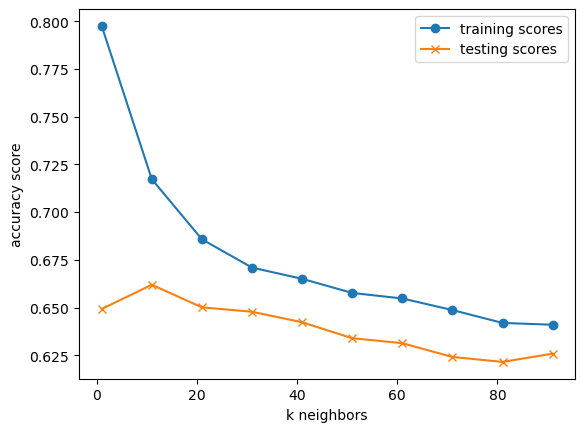

In [44]:
#importing matplotlib for creating graphs
import matplotlib.pyplot as plt
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = [] # training_scores list to store results
test_scores = [] # testing_scores list to store results

#looping through the k in range of 1 to 30 in increments of 3
for k in range(1, 101, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the results
plt.plot(range(1, 101, 10), train_scores, marker='o', label="training scores")
plt.plot(range(1, 101, 10), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [45]:
# Import the PCA module
from sklearn.decomposition import PCA

In [46]:
# Instantiate the PCA instance and declare the number of PCA variables
pca = PCA(n_components=2)

In [47]:
# Fit the PCA model on the transformed credit card DataFrame
X_imputed_transformed = pca.fit_transform(X_imputed)

# Review the first 5 rows of list data
X_imputed_transformed

array([[-3.47775224,  0.30956224],
       [ 3.50514395, -1.41739612],
       [ 3.50514395, -1.41739612],
       ...,
       [-4.4864803 ,  1.25064004],
       [-4.56929605,  0.60036114],
       [-4.50657158,  0.40571082]])

In [48]:
# Calculate the PCA explained variance ratio
pca.explained_variance_ratio_

array([0.56702808, 0.11964531])

In [49]:
# Create the PCA DataFrame
ccinfo_pca_df = pd.DataFrame(
    X_imputed_transformed,
    columns=["PCA1", "PCA2"]
)

# Review the PCA DataFrame
ccinfo_pca_df.head(20)

PCA1      PCA2
0  -3.477752  0.309562
1   3.505144 -1.417396
2   3.505144 -1.417396
3   3.505144 -1.417396
4   3.505144 -1.417396
5   3.505144 -1.417396
6   3.505144 -1.417396
7   3.505144 -1.417396
8   3.505144 -1.417396
9   6.500397 -2.256586
10  6.500397 -2.256586
11  6.500397 -2.256586
12 -2.799130 -5.953346
13  5.459219 -1.350993
14  6.441796  0.555395
15 -2.454542 -0.178941
16 -2.454542 -0.178941
17 -2.454542 -0.178941
18 -2.454542 -0.178941
19 -2.454542 -0.178941

In [50]:
from sklearn.cluster import KMeans

In [51]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

# Append the value of the computed inertia from the `inertia_` attribute of teh KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=42)
    k_model.fit(X_imputed_transformed)
    inertia.append(k_model.inertia_)

# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

k        inertia
0  1  405891.665877
1  2   82760.331473
2  3   67464.977962
3  4   40852.385561
4  5   35706.777993

<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

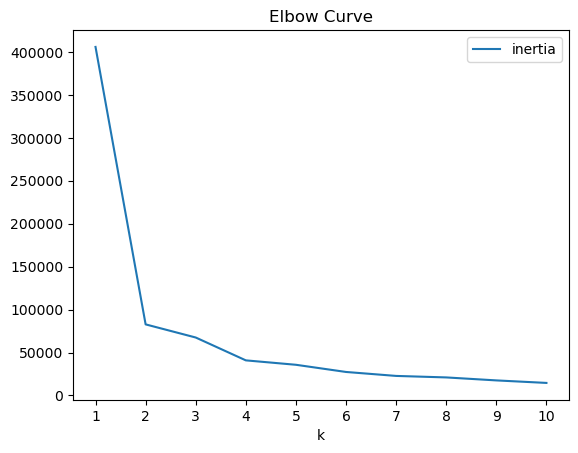

In [52]:
# Plot the Elbow Curve
df_elbow.plot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

In [53]:
# Determine the rate of decrease between each k value
k = df_elbow["k"]
inertia = df_elbow["inertia"]
for i in range(1, len(k)):
    percentage_decrease = (inertia[i-1] - inertia[i]) / inertia[i-1] * 100
    print(f"Percentage decrease from k={k[i-1]} to k={k[i]}: {percentage_decrease:.2f}%")

Percentage decrease from k=1 to k=2: 79.61%
Percentage decrease from k=2 to k=3: 18.48%
Percentage decrease from k=3 to k=4: 39.45%
Percentage decrease from k=4 to k=5: 12.60%
Percentage decrease from k=5 to k=6: 23.42%
Percentage decrease from k=6 to k=7: 16.85%
Percentage decrease from k=7 to k=8: 7.71%
Percentage decrease from k=8 to k=9: 16.53%
Percentage decrease from k=9 to k=10: 16.74%


In [54]:
# Define the model with 3 clusters
model = KMeans(n_clusters=5, n_init='auto', random_state=1)

# Fit the model
model.fit(ccinfo_pca_df)

# Make predictions
k_5 = model.predict(ccinfo_pca_df)

# Create a copy of the PCA DataFrame
ccinfo_pca_predictions_df = ccinfo_pca_df.copy()

# Add a class column with the labels
ccinfo_pca_predictions_df["customer_segments"] = k_5

<Axes: xlabel='PCA1', ylabel='PCA2'>

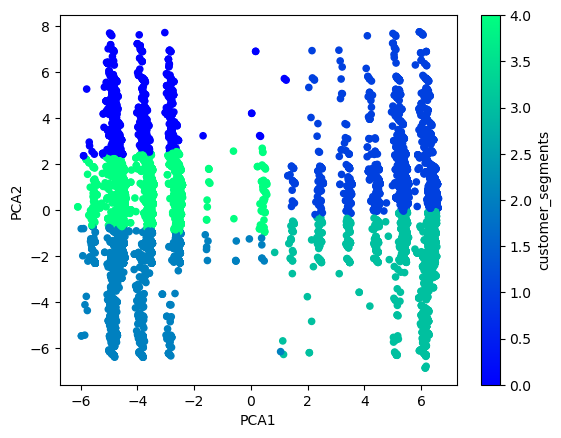

In [55]:
# Plot the clusters
ccinfo_pca_predictions_df.plot.scatter(
    x="PCA1",
    y="PCA2",
    c="customer_segments",
    colormap='winter')

In [56]:
# What columns contribute the most to the explained variance?
# Calculate the PCA explained variance ratio
pca.explained_variance_ratio_

array([0.56702808, 0.11964531])

In [57]:
# Determine which feature has the stronger influence on each principal component. 
# Use the columns from the original DataFrame. FYI: The data has already been scaled and fitted.
pca_component_weights = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2'], index=X.columns)
pca_component_weights

PCA1      PCA2
decisionType    -0.025648 -0.340901
threeJudgeFdc    0.022959 -0.004028
certReason      -0.997462 -0.003256
lcDisposition   -0.043338  0.638872
partyWinning    -0.009328  0.028368
majVotes         0.011730  0.425599
chief_term      -0.007839  0.024851
decisionType    -0.025648 -0.340901
minVotes        -0.008361 -0.419330
caseDisposition -0.031520  0.031524

In [58]:
# Create the logistic regression classifier model with a random_state of 1
lr_model = LogisticRegression(max_iter=1000)

# Fit the model to the training data
lr_model.fit(X_train, y_train)

c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [59]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {lr_model.score(X_train, y_train)}")
print(f"Testing Data Score: {lr_model.score(X_test, y_test)}")

Training Data Score: 0.5694898941289701
Testing Data Score: 0.5554272517321016


In [60]:
lr_predictions = lr_model.predict(X_test)
# Calculate the accuracy score
acc_score = accuracy_score(y_test, lr_predictions)

print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.5554272517321016


In [61]:
from sklearn.model_selection import cross_val_score
X = pd.DataFrame(imputer.fit_transform(X_imputed), columns=X_imputed.columns)
y = y_imputed

# Test different values of n_neighbors
for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=2)
    print(f'n_neighbors={k}, Cross-Validation Score: {scores.mean()}')

c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors=1, Cross-Validation Score: 0.5216543958423561


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors=2, Cross-Validation Score: 0.5197776815360184


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors=3, Cross-Validation Score: 0.5313266926519417


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors=4, Cross-Validation Score: 0.5301717915403493


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors=5, Cross-Validation Score: 0.5308214234156201


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors=6, Cross-Validation Score: 0.5341417641114479


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors=7, Cross-Validation Score: 0.5265627255666234


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors=8, Cross-Validation Score: 0.5300274289014003


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors=9, Cross-Validation Score: 0.5275010827197921


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors=10, Cross-Validation Score: 0.5296665223040278


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors=11, Cross-Validation Score: 0.5289447091092825


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors=12, Cross-Validation Score: 0.5333477695972282


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors=13, Cross-Validation Score: 0.5361628410567345


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors=14, Cross-Validation Score: 0.5331312256388047


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors=15, Cross-Validation Score: 0.5338530388335498


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors=16, Cross-Validation Score: 0.5338530388335498


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors=17, Cross-Validation Score: 0.5337808575140753


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors=18, Cross-Validation Score: 0.5415764400173235


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors=19, Cross-Validation Score: 0.5389057311967662


In [62]:
# Create the random forest classifier model
# with n_estimators=128 and random_state=1
rf_model = RandomForestClassifier(n_estimators=128, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=128, random_state=42)

In [63]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {rf_model.score(X_train, y_train)}")
print(f"Testing Data Score: {rf_model.score(X_test, y_test)}")

Training Data Score: 0.83888354186718
Testing Data Score: 0.6827367205542725


In [64]:
rf_predictions = rf_model.predict(X_test)
# Calculate the accuracy score
acc_score = accuracy_score(y_test, rf_predictions)

print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.6827367205542725


In [65]:
from sklearn import tree

In [66]:
dt_model = tree.DecisionTreeClassifier()

In [67]:
d_model = dt_model.fit(X_train, y_train)

In [68]:
# Making predictions using the testing data
dt_predictions = d_model.predict(X_test)
acc_score = accuracy_score(y_test, dt_predictions)

print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.6729214780600462


In [69]:
# Calculate the accuracy score
acc_score = accuracy_score(y_test, dt_predictions)

print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.6729214780600462


In [70]:
!pip install pydotplus

In [71]:
import pydotplus
from IPython.display import Image

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.216495 to fit



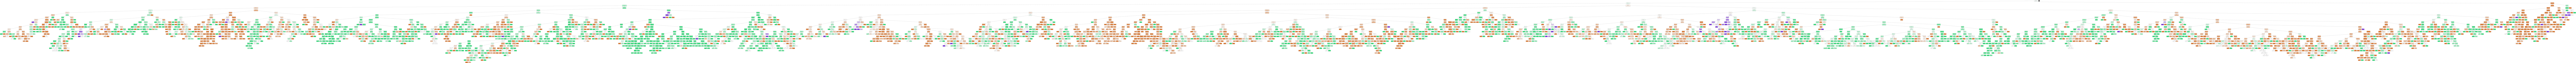

In [72]:
#Create DOT data
dot_data = tree.export_graphviz(
    d_model, out_file=None, feature_names=X_imputed.columns, filled=True, max_depth=30
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

